In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import plotly.express as px
import plotly.graph_objects as go

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/ashukumar7/Covid19/master/covid19_clean.csv')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30210 entries, 0 to 30209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9120 non-null   object 
 1   Country/Region  30210 non-null  object 
 2   Lat             30210 non-null  float64
 3   Long            30210 non-null  float64
 4   Date            30210 non-null  object 
 5   Confirmed       30210 non-null  int64  
 6   Deaths          30210 non-null  int64  
 7   Recovered       30210 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.8+ MB


In [6]:
#DATA SET PRE PROCESSING

df = pd.read_csv(r'https://raw.githubusercontent.com/ashukumar7/Covid19/master/covid19_clean.csv',parse_dates=['Date'])
#df.info()

In [7]:
df.rename(columns={"Country/Region":"country",'Province/State':'state'},inplace=True)
#df.head()

In [8]:
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [9]:
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('country')['Confirmed','active','Deaths'].sum()
#world.head()

world = top.groupby('country')['Confirmed','active','Deaths','Recovered'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,Confirmed,active,Deaths,Recovered
0,Afghanistan,5639,4812,136,691
1,Albania,898,173,31,694
2,Algeria,6442,2755,529,3158
3,Andorra,761,116,49,596
4,Angola,48,32,2,14


# **PLOTTING OVER WORLD MAP**

In [10]:
#CONFIRMED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Confirmed",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with CONFIRMED Cases")
figure.show()

Number of Active Test Cases

In [11]:

#ACTIVE CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="active",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with ACTIVE Cases")
figure.show()


In [12]:
#DEATH CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Deaths",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with DEATH Cases")
figure.show()

In [13]:
#RECOVERED CASES
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="Recovered",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Country with RECOVERED Cases")
figure.show()

# **CASES OVER TIME**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

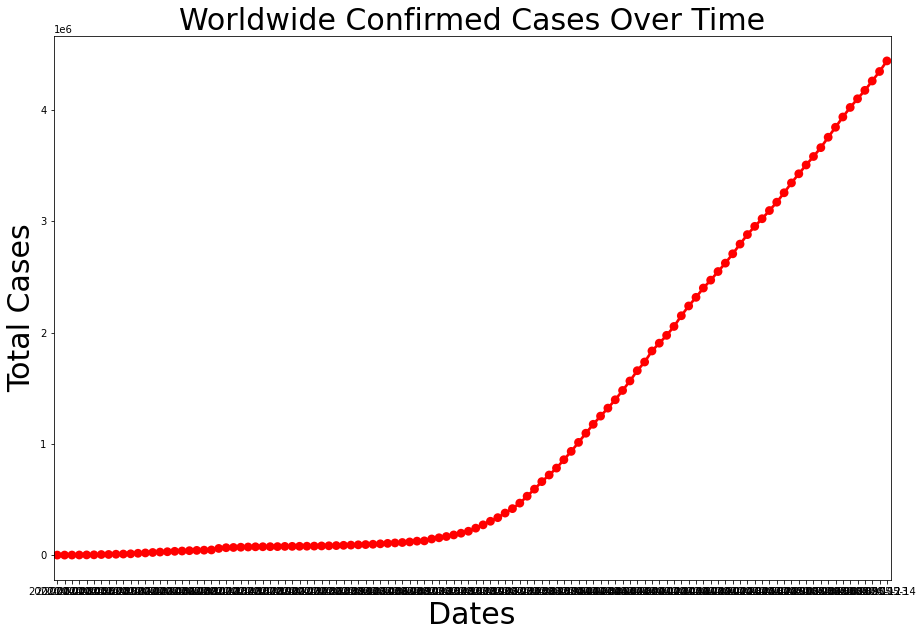

In [14]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Confirmed,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

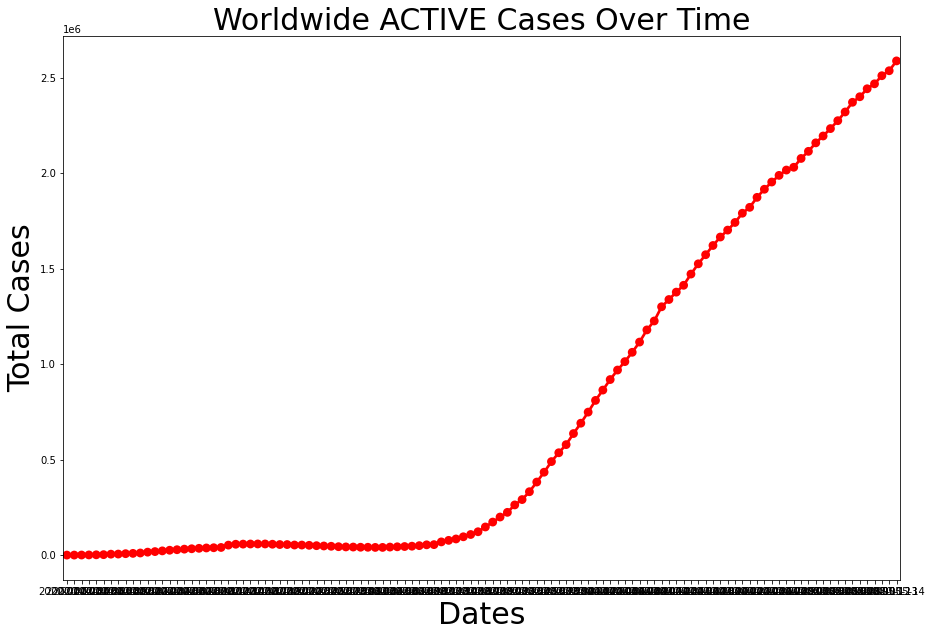

In [15]:
#ACTIVE CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide ACTIVE Cases Over Time",fontsize=30)
total_cases = df.groupby('Date')['Date','active'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.active,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

In [23]:
#CHINA US ITALY INDIA

china = df[df.country == 'China']
#china.head()
china = china.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#china.head(10)

us = df[df.country == 'US']
us = us.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#us.head(10)

italy = df[df.country == 'Italy']
italy = italy.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#italy.head(10)

india = df[df.country == 'India']
india = india.groupby(by='Date')['Recovered','active','Confirmed','Deaths'].sum().reset_index()
#india.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

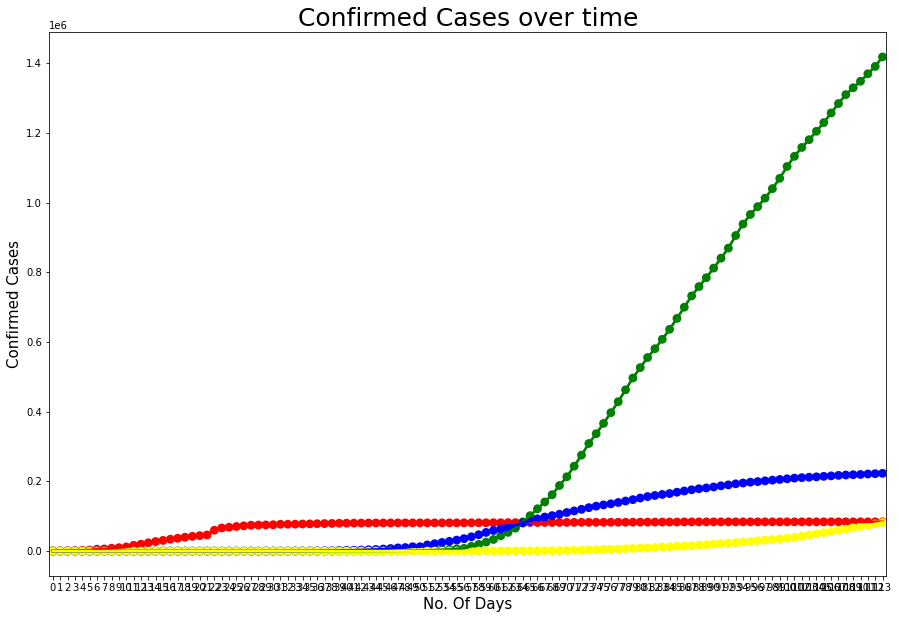

In [24]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Confirmed,color="Red")
sns.pointplot(us.index,us.Confirmed,color="Green")
sns.pointplot(italy.index,italy.Confirmed,color="Blue")
sns.pointplot(india.index,india.Confirmed,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

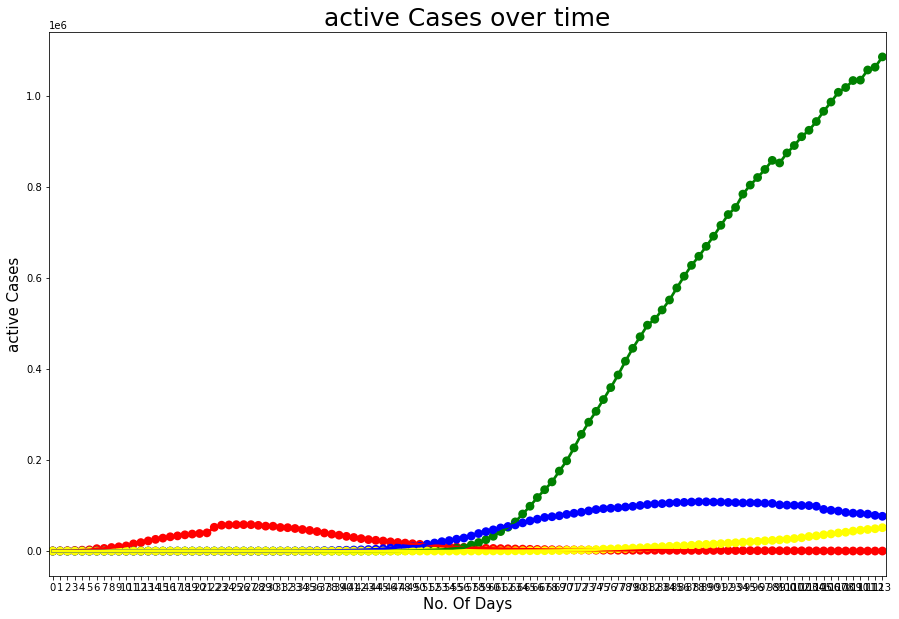

In [25]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.active,color="Red")
sns.pointplot(us.index,us.active,color="Green")
sns.pointplot(italy.index,italy.active,color="Blue")
sns.pointplot(india.index,india.active,color="Yellow")
plt.title("active Cases over time", fontsize=25)
plt.ylabel("active Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

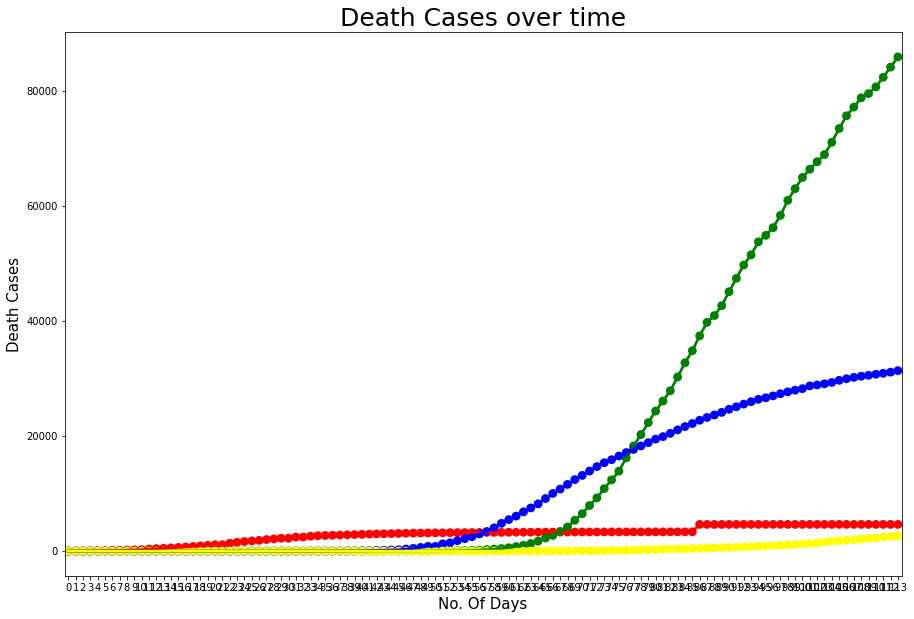

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Deaths,color="Red")
sns.pointplot(us.index,us.Deaths,color="Green")
sns.pointplot(italy.index,italy.Deaths,color="Blue")
sns.pointplot(india.index,india.Deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

# **TOP 20 COUNTRIES**

In [16]:
#CONFIRMED
top_confirm = top.groupby(by='country')['Confirmed'].sum()
top_confirm.head()

country
Afghanistan    5639
Albania         898
Algeria        6442
Andorra         761
Angola           48
Name: Confirmed, dtype: int64

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

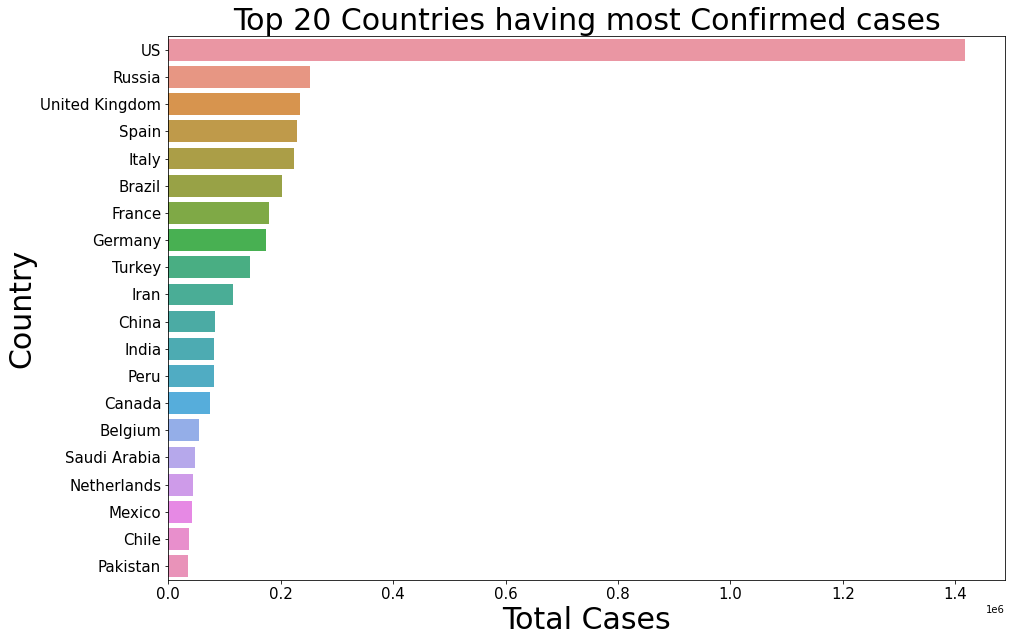

In [17]:
top_confirm= top.groupby(by='country')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirm.Confirmed,y=top_confirm.country)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

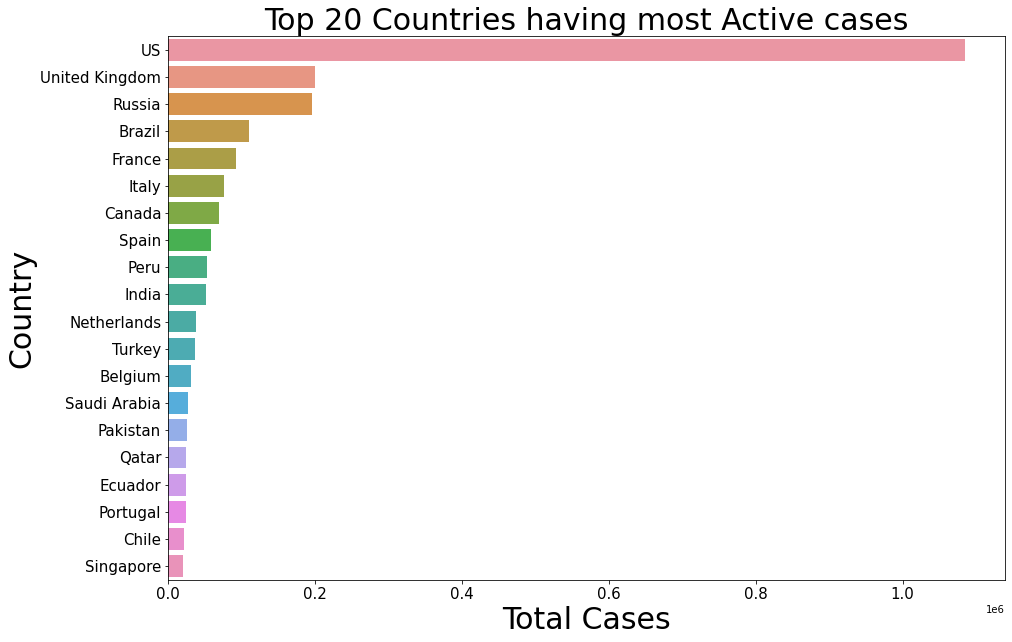

In [18]:
top_actives= top.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active,y=top_actives.country)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

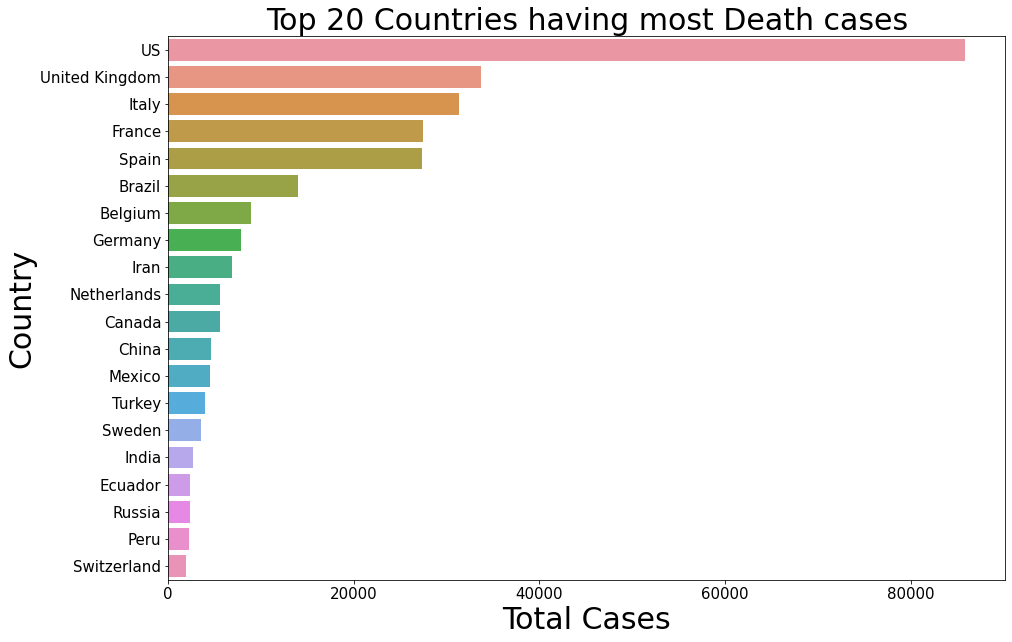

In [19]:
top_death= top.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Death cases",fontsize=30)
ax = sns.barplot(x=top_death.Deaths,y=top_death.country)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

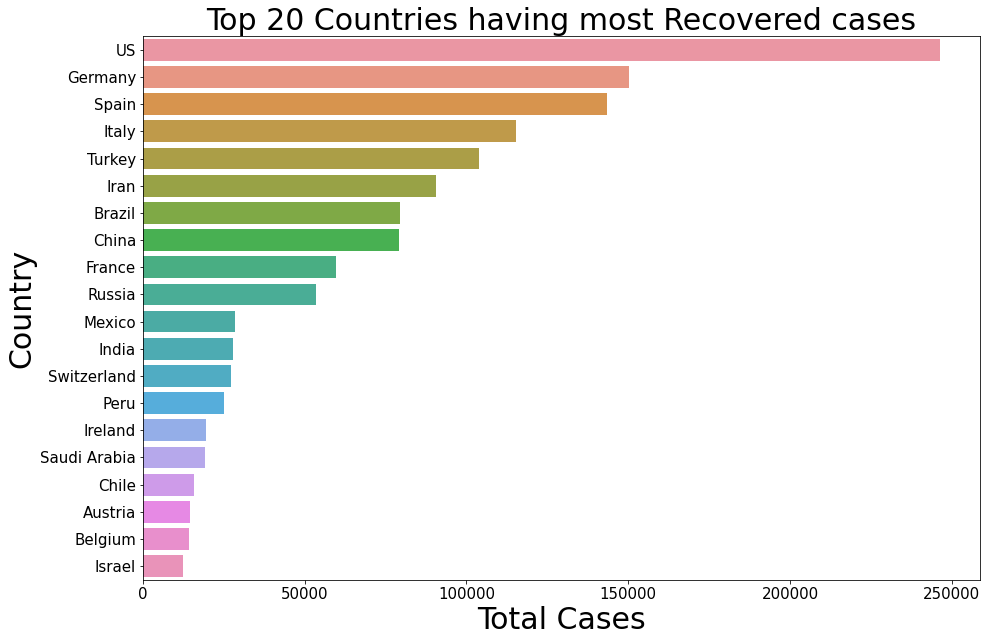

In [20]:
top_recover= top.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recover.Recovered,y=top_recover.country)
ax.set(xlabel="Total Cases",ylabel="Country")